### CMIP6 Data from Google Cloud Storage

Details on CMIP data can be found here: https://pcmdi.llnl.gov/CMIP6/Guide/dataUsers.html & https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q/edit

This notebook follows from these articles:

https://medium.com/pangeo/cmip6-in-the-cloud-five-ways-96b177abe396

https://github.com/pangeo-data/pangeo-cmip6-examples/blob/master/intake_ESM_example.ipynb

### Import statements

We need `intake`, `intake-esm`.  Install them in the `clim680` environment. 

Note it seems you need to specify version 0.6.0:

conda install -c conda-forge intake=0.6.0

In [32]:
import xarray as xr
import pandas as pd
import intake
import matplotlib.pyplot as plt

### Open the intake catalog

This is a table that can be turned into a pandas Dataframe.  It gives us a standard set of information about the available data.

We can then search on that information to find what datasets we want.

In [33]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,709
grid_label,10
zstore,517667
dcpp_init_year,60


In [34]:
# Alternative approach
#fullcat = intake.open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/climate.yaml")
#col = fullcat.cmip6_gcs
#col

In [35]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,va,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,evspsbl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,6hrPlev,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,zg,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,vas,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


### What are the possible experiments I can choose from?

In [36]:
print(col.df.experiment_id.unique())

['highresSST-present' 'piControl' 'control-1950' 'hist-1950' 'historical'
 'amip' 'abrupt-4xCO2' 'abrupt-0p5xCO2' 'abrupt-2xCO2' '1pctCO2' 'ssp119'
 'ssp585' 'hist-1950HC' 'piClim-4xCO2' 'ssp245' 'ssp126' 'piClim-ghg'
 'piClim-aer' 'piClim-anthro' 'hist-piAer' 'piClim-control'
 'piClim-histaer' 'hist-piNTCF' 'piClim-2xdust' 'histSST-piO3'
 'histSST-1950HC' 'piClim-2xVOC' 'piClim-2xss' 'piClim-CH4'
 'histSST-piNTCF' 'histSST-piAer' 'piClim-2xNOx' 'histSST' 'piClim-HC'
 'ssp370SST-lowNTCF' 'piClim-O3' 'piClim-NOx' 'piClim-VOC' 'piClim-NTCF'
 'piClim-histghg' 'ssp370SST-lowCH4' 'ssp370-lowNTCF' 'ssp370SST'
 'ssp370SST-ssp126Lu' 'piClim-histall' 'ssp370pdSST' 'piClim-histnat'
 'piClim-lu' 'faf-water' 'ssp370' 'amip-hist' 'faf-heat' 'faf-heat-NA0pct'
 'faf-heat-NA50pct' 'faf-all' 'hist-aer' 'hist-GHG' 'hist-nat' 'esm-hist'
 'faf-stress' 'faf-passiveheat' 'ssp370-ssp126Lu' 'omip1'
 'ssp126-ssp370Lu' 'hist-noLu' 'highresSST-future' 'esm-ssp585-ssp126Lu'
 'land-noLu' 'land-hist-altStartYear' '

### Find the data for a specific experiment and model

In [37]:
cat = col.search(experiment_id='historical', 
                 table_id='Oyr', variable_id='o2',
                 grid_label='gn',institution_id='CCCma',
                source_id='CanESM5',
                member_id='r1i1p1f1')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Oyr,o2,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429


### Get the names of the files we selected from Google cloud storage

In [38]:
datasets = cat.to_dataset_dict()
datasets
list(datasets.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.CCCma.CanESM5.historical.Oyr.gn']

In [39]:
ds = datasets['CMIP.CCCma.CanESM5.historical.Oyr.gn']
ds

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 360, j: 291, lev: 45, member_id: 1, time: 165, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * lev                 (lev) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
    lev_bnds            (lev, bnds) float64 dask.array<chunksize=(45, 2), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-07-02 12:00:00 ... 2014-07-02 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(165, 2), meta=np.ndarray>
  * member_id           (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    o2                  (member_id, time, lev, j, i) float32 dask.array<chunksize=(1, 12, 45, 291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variable_id:                 o2
    variant_label:               r1i1p1f1
    version:                     v20190429
    status:                      2019-10-25;created;by nhn2@columbia.edu
    intake_esm_varname:          ['o2']
    intake_esm_dataset_key:      CMIP.CCCma.CanESM5.historical.Oyr.gn

In [40]:
ds['o2']

<xarray.DataArray 'o2' (member_id: 1, time: 165, lev: 45, j: 291, i: 360)>
dask.array<broadcast_to, shape=(1, 165, 45, 291, 360), dtype=float32, chunksize=(1, 12, 45, 291, 360), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
    latitude   (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * lev        (lev) float64 3.047 9.454 16.36 ... 5.126e+03 5.375e+03 5.625e+03
    longitude  (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time       (time) object 1850-07-02 12:00:00 ... 2014-07-02 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        'Mole concentration' means number of moles per unit volum...
    history:        meanm2y_mltby1em3
    long_name:      Dissolved Oxygen Concentration
    original_name:  O2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

Text(0.5, 1.0, 'Dissolved Oxygen Concentration[mol m-3]')

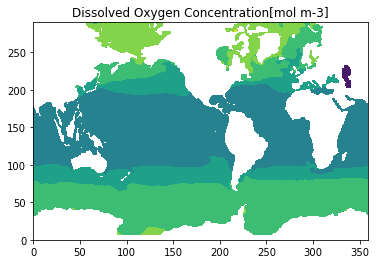

In [41]:
plt.contourf(ds['o2'][0,0,0,:,:])
plt.title('Dissolved Oxygen Concentration[mol m-3]')

Text(0.5, 1.0, 'Change in Dissolved Oxygen Concentrations [$mol \\; m^{-3}$]')

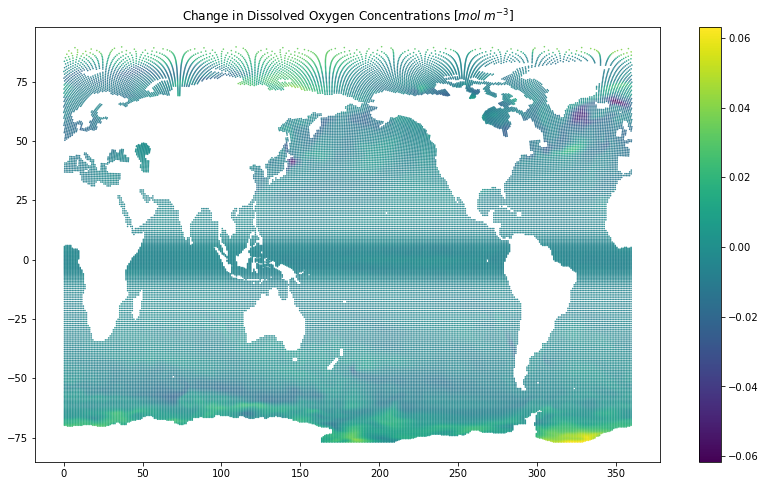

In [42]:
# Plot illustrating the irregular grid
fig = plt.figure(figsize=(14,8))
plt.scatter(ds['longitude'],ds['latitude'],c=ds['o2'][0,-1,0,:,:]-ds['o2'][0,0,0,:,:],s=0.3)
plt.colorbar()
plt.title('Change in Dissolved Oxygen Concentrations [$mol \; m^{-3}$]')